# QUESTION 3

Looking to sell your property in Melbourne? Which real estate agency will get you the best value?

In this question, we are investigating the performance of Melbourne's top real estate agencies, to inform property sellers of which agency is likely to obtain them the best property sale price in relation to their estimated property value. We've provided refined pricing estimates informed by the independent variables outlined in Question 1, and will describe the performance of agencies based on their chosen sale methods, total number of properties sold, performance based on property location and their obtained sale prices in relation to the estimated value.

## Data Preparation

### Importing the packages & data

In [119]:
#Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import hvplot.pandas

In [120]:
#Save the dataset filepath
cleaned_path = "~/Documents/DataBootcamp/PythonProjects/Properties_of_Melbourne_City_CLEANED.csv"

In [121]:
#Read the cleaned csv file into a dataframe
cleaned_df = pd.read_csv(cleaned_path)

In [122]:
#Display the dataframe for preview
cleaned_df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [123]:
#Remove the old indexing column 'Unnamed: 0'
del cleaned_df["Unnamed: 0"]

#Check the changes have applied
cleaned_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Reducing the Dataset to relevant columns

In [124]:
#Reduce the dataset to the relevant columns
melb_data = cleaned_df[["SellerG", "Price", "Type", "Bedroom2", "Longtitude", "Lattitude"]]

#Check the new dataframe
melb_data.head()

,SellerG,Price,Type,Bedroom2,Longtitude,Lattitude
0,Biggin,1480000,h,2.0,144.9984,-37.7996
1,Biggin,1035000,h,2.0,144.9934,-37.8079
2,Biggin,1465000,h,3.0,144.9944,-37.8093
3,Biggin,850000,h,3.0,144.9969,-37.7969
4,Nelson,1600000,h,3.0,144.9941,-37.8072


### NA Checks & Removal

In [125]:
#Check for the presence of any null values
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SellerG     18396 non-null  object 
 1   Price       18396 non-null  int64  
 2   Type        18396 non-null  object 
 3   Bedroom2    14927 non-null  float64
 4   Longtitude  15064 non-null  float64
 5   Lattitude   15064 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 862.4+ KB


In [126]:
#There are NA values present in the Bedroom2 column, as denoted by its lower non-null count.
#Remove NA values from the dataset
melb_data_clean = melb_data.dropna(how='any')
melb_data_clean.reset_index(drop=True, inplace=True)

#Check the changes have applied
print(f'There are now {melb_data_clean["Bedroom2"].isnull().sum()} NA values.')

There are now 0 NA values.


### Group the data by Demographic
- Single: 
    - Type = Unit, Townhouse
    - Bedrooms = <=2
- Couples:
    - Type = Unit, Townhouse, House
    - Bedrooms = 2
- Small Family:
    - Type = Unit, Townhouse, House
    - Bedrooms: 2-3
- Larger Family:
    - Type = House
    - Bedrooms: >=3

In [127]:
#Bin the property types by Type & Bedroom Number per defined demographic
#Single
single_df = melb_data_clean.loc[((melb_data_clean["Type"] == "u") | (melb_data_clean["Type"] == "t")) & (melb_data_clean["Bedroom2"] <= 2), :]
print(f'There are {len(single_df)} properties that categories under the Single living demographic.')

#Couple
couple_df = melb_data_clean.loc[melb_data_clean["Bedroom2"] == 2, :]
print(f'There are {len(couple_df)} properties that categories under the Couple living demographic.')

#Small Family
small_fam_df = melb_data_clean.loc[(melb_data_clean["Bedroom2"] == 2) | (melb_data_clean["Bedroom2"] == 3), :]
print(f'There are {len(small_fam_df)} properties that categories under the Small Family living demographic.')

#Larger Family
large_fam_df = melb_data_clean.loc[(melb_data_clean["Type"] == "h") & (melb_data_clean["Bedroom2"] >= 3), :]
print(f'There are {len(large_fam_df)} properties that categories under the Larger Family living demographic.')

There are 3230 properties that categories under the Single living demographic.
There are 4122 properties that categories under the Couple living demographic.
There are 10575 properties that categories under the Small Family living demographic.
There are 8569 properties that categories under the Larger Family living demographic.


All of these sample sizes are large enough to continue with our analysis.

## Number of Properties Sold
Finding the highest number of properties sold per real estate agency per living demographic, and displaying them as a histogram.

### Top Sellers Overall

In [128]:
#Collate the Top 10 sellers overall
top_ten = []

sellers = melb_data_clean.groupby("SellerG").count().sort_values('Type', ascending=False).head(10)
sellers = sellers.reset_index(drop=False)

for i in range(0, len(sellers)):
    top_ten.append(sellers.iloc[i, 0])

top_ten

['Nelson',
 'Jellis',
 'hockingstuart',
 'Barry',
 'Ray',
 'Marshall',
 'Buxton',
 'Biggin',
 'Brad',
 'Woodards']

In [129]:
#Collect the data from each of these sellers
top_ten_filter = melb_data_clean["SellerG"].isin(top_ten)
top_ten_df = melb_data_clean[top_ten_filter]
top_ten_df.value_counts("SellerG")

SellerG
Nelson           1682
Jellis           1457
hockingstuart    1274
Barry            1108
Ray               786
Marshall          720
Buxton            701
Biggin            417
Brad              367
Woodards          334
dtype: int64

In [136]:
#Organising the data into one dataframe
#Singles
single_ten = top_ten_df.loc[((top_ten_df["Type"] == "u") | (top_ten_df["Type"] == "t")) & (top_ten_df["Bedroom2"] <= 2), :]
y1_values = single_ten[["SellerG", "Price"]].groupby("SellerG").count()
y1_values = y1_values.rename(columns={"Price": "Single"})

#Couples
couple_ten = top_ten_df.loc[top_ten_df["Bedroom2"] == 2, :]
y2_values = couple_ten[["SellerG", "Price"]].groupby("SellerG").count()
y2_values = y2_values.rename(columns={"Price": "Couple"})

#Small Family
small_fam_ten = top_ten_df.loc[(top_ten_df["Bedroom2"] == 2) | (top_ten_df["Bedroom2"] == 3), :]
y3_values = small_fam_ten[["SellerG", "Price"]].groupby("SellerG").count()
y3_values = y3_values.rename(columns={"Price": "Small Family"})

#Large Family
large_fam_ten = top_ten_df.loc[(top_ten_df["Type"] == "h") & (top_ten_df["Bedroom2"] >= 3), :]
y4_values = large_fam_ten[["SellerG", "Price"]].groupby("SellerG").count()
y4_values = y4_values.rename(columns={"Price": "Large Family"})

#Join the datasets
top_ten_merged = pd.concat([y1_values, y2_values, y3_values, y4_values], axis=1)
top_ten_merged.reset_index(drop=False, inplace=True)
top_ten_merged

,SellerG,Single,Couple,Small Family,Large Family
0,Barry,107,197,765,783
1,Biggin,130,164,315,184
2,Brad,72,83,267,219
3,Buxton,135,161,475,393
4,Jellis,350,463,1008,747
5,Marshall,111,161,441,476
6,Nelson,314,534,1287,952
7,Ray,128,158,506,525
8,Woodards,103,117,246,162
9,hockingstuart,423,427,904,603


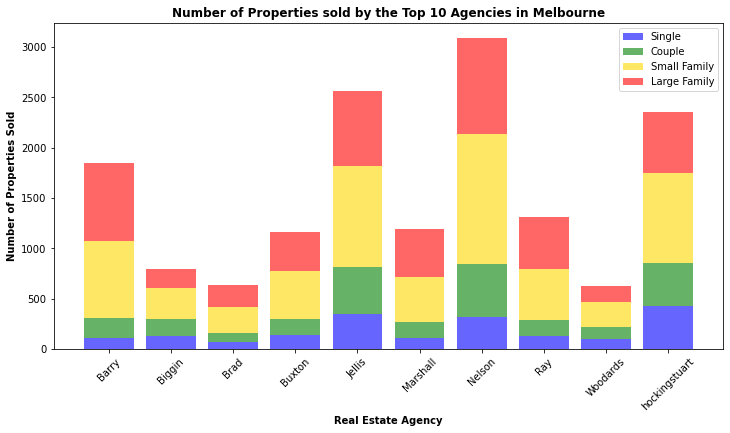

In [131]:
#Construct the stacked bar chart
x_values = top_ten_merged["SellerG"]
y1 = top_ten_merged["Single"]
y2 = top_ten_merged["Couple"]
y3 = top_ten_merged["Small Family"]
y4 = top_ten_merged["Large Family"]

#Bar Plots
plt.figure(figsize=(12,6))

plt.bar(x_values, y1, color="blue", alpha=0.60)
plt.bar(x_values, y2, bottom=y1, color="green", alpha=0.60)
plt.bar(x_values, y3, bottom=y1+y2, color="gold", alpha=0.60)
plt.bar(x_values, y4, bottom=y1+y2+y3, color="red", alpha=0.60)
plt.xlabel("Real Estate Agency", fontweight='bold')
plt.ylabel("Number of Properties Sold", fontweight='bold')
plt.title("Number of Properties sold by the Top 10 Agencies in Melbourne", fontweight='bold')
plt.legend(["Single", "Couple", "Small Family", "Large Family"])

tick_locations = [i for i in x_values]
plt.xticks(tick_locations, x_values, rotation=45)

plt.show()


## Location Performance
Which agents perform well in which areas of Melbourne?

### Map of Sales per Agent

In [132]:
# Configure the map plot
map_plot_1 = melb_data_clean.hvplot.points(
    "Longtitude",
    "Lattitude",
    geo = True,
    size = "Rooms",
    tiles = "OSM",
    hover_cols = ["Price", "Distance", "Suburb"],
    frame_width = 800,
    frame_height = 600,
    color = "SellerG")

# Display the map
map_plot_1

ImportError: Geographic projection support requires GeoViews and cartopy.

## Performance - Sale Price compared to Average

In [169]:
#Calculate the overall mean prices
# single_mean = single_ten["Price"].mean()
# couple_mean = couple_ten["Price"].mean()
# small_fam_mean = small_fam_ten["Price"].mean()
# large_fam_mean = large_fam_ten["Price"].mean()

#Calculate the mean prices per seller
single_means = single_ten[["SellerG", "Price"]].groupby("SellerG").mean()
single_means = single_means.rename(columns={"Price": "Single"})

couple_means = couple_ten[["SellerG", "Price"]].groupby("SellerG").mean()
couple_means = couple_means.rename(columns={"Price": "Couple"})

small_fam_means = small_fam_ten[["SellerG", "Price"]].groupby("SellerG").mean()
small_fam_means = small_fam_means.rename(columns={"Price": "Small Family"})

large_fam_means = large_fam_ten[["SellerG", "Price"]].groupby("SellerG").mean()
large_fam_means = large_fam_means.rename(columns={"Price": "Large Family"})

#Join the datasets
boxplot_means = pd.concat([single_means, couple_means, small_fam_means, large_fam_means], axis=1)
# boxplot_means.reset_index(drop=False, inplace=True)
boxplot_means

,Single,Couple,Small Family,Large Family
SellerG,,,,
Barry,488744.392523,6.563098e+05,7.803061e+05,9.456324e+05
Biggin,543373.076923,8.402317e+05,9.785302e+05,1.326462e+06
Brad,446402.777778,6.667892e+05,7.849801e+05,9.591402e+05
Buxton,644107.407407,8.273012e+05,1.109598e+06,1.465631e+06
Jellis,637763.585714,9.140271e+05,1.194870e+06,1.761586e+06
Marshall,709559.801802,1.057287e+06,1.494118e+06,2.302846e+06
Nelson,557015.127389,7.943825e+05,9.493929e+05,1.213403e+06
Ray,508578.125000,6.358101e+05,7.940205e+05,9.855435e+05
Woodards,569485.281553,7.893546e+05,1.000177e+06,1.339927e+06


KeyError: 'SellerG'

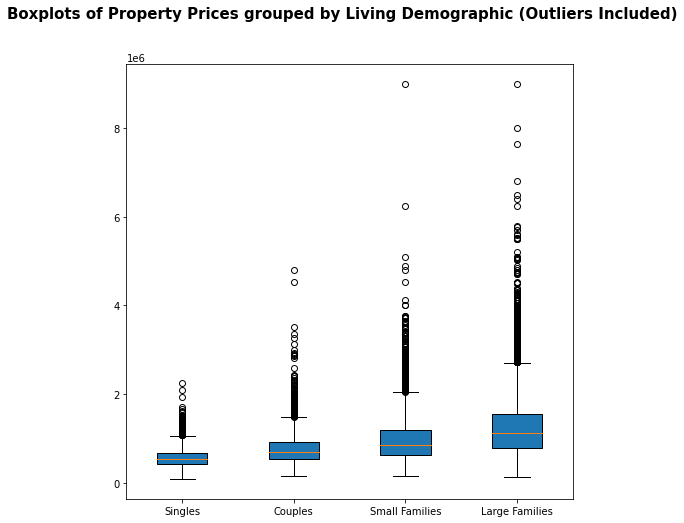

In [162]:
#Collect the boxplot data
boxplot_demo_dict = {"Singles": single_df["Price"], 
                    "Couples": couple_df["Price"], 
                    "Small Families": small_fam_df["Price"],
                    "Large Families": large_fam_df["Price"]}

boxplot_means_dict = {"Singles": boxplot_means["Single"], 
                    "Couples": boxplot_means["Couple"], 
                    "Small Families": boxplot_means["Small Family"],
                    "Large Families": boxplot_means["Large Family"]}

fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Boxplots of Property Prices grouped by Living Demographic (Outliers Included)", fontsize = 15, fontweight = 'bold')
bp = ax.boxplot(boxplot_demo_dict.values(), labels=boxplot_demo_dict.keys(), patch_artist=True)
for i, d in enumerate(boxplot_means):
    y = boxplot_means_dict[d]
    x = boxplot_means_dict[d][i]
    plt.scatter(x,y)
# bp['boxes'][0].set_facecolor('royalblue')
# bp['boxes'][1].set_facecolor('cornflowerblue')
# bp['boxes'][2].set_facecolor('lightskyblue')
# bp['boxes'][3].set_facecolor('paleturquoise')
ax.set_ylabel("Price ($AUD)", fontweight='bold')
ax.set_xlabel("Living Demographic", fontweight='bold')

plt.tight_layout()


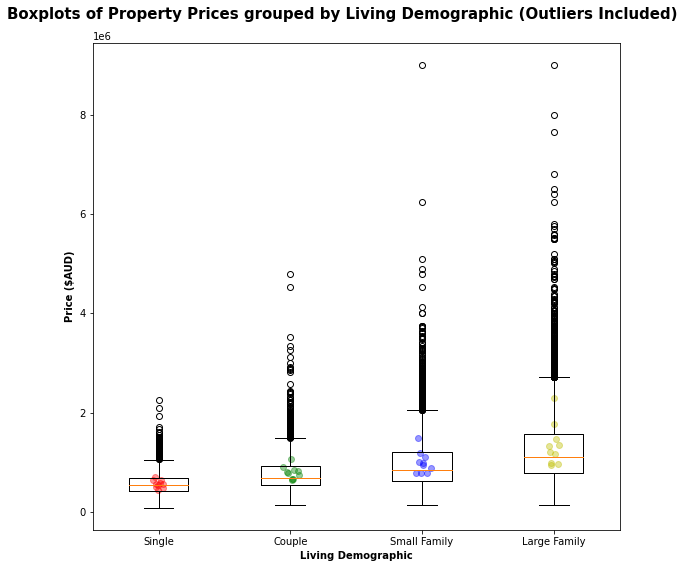

In [182]:
vals, names, xs = [], [], []

for i, col in enumerate(boxplot_means):
    vals.append(boxplot_means[col].values)
    names.append(col)
    xs.append(np.random.normal((int(round(i,0)) + 1), 0.04, boxplot_means[col].values.shape[0]))

fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Boxplots of Property Prices grouped by Living Demographic (Outliers Included)", fontsize = 15, fontweight = 'bold')
plt.boxplot(boxplot_demo_dict.values(), labels=names)
ax.set_ylabel("Price ($AUD)", fontweight='bold')
ax.set_xlabel("Living Demographic", fontweight='bold')

palette = ['r', 'g', 'b', 'y']

for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)

plt.tight_layout()
plt.show()

In [ ]:
#Remove Outliers
iqr_multiplier = 1.5

#Singles
#Check for outliers
Q1 = single_df["Price"].quantile(0.25)
Q3 = single_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
single_no_out = single_df.loc[(single_df["Price"] >= lower_bound) & (single_df["Price"] <= upper_bound), :]
single_data = single_no_out["Price"]
        
#printcheck
print(f"Single Property Price values below {lower_bound} could be an outlier")
print(f"Single Property Price values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Couples
#Check for outliers
Q1 = couple_df["Price"].quantile(0.25)
Q3 = couple_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
couple_no_out = couple_df.loc[(couple_df["Price"] >= lower_bound) & (couple_df["Price"] <= upper_bound), :]
couple_data = couple_no_out["Price"]
        
#printcheck
print(f"Couple Property Price values below {lower_bound} could be an outlier")
print(f"Couple Property Price values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Small Family
#Check for outliers
Q1 = small_fam_df["Price"].quantile(0.25)
Q3 = small_fam_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
single_no_out = single_df.loc[(single_df["Price"] >= lower_bound) & (single_df["Price"] <= upper_bound), :]
single_data = single_no_out["Price"]
        
#printcheck
print(f"Single Property Price values below {lower_bound} could be an outlier")
print(f"Single Property Price values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Singles
#Check for outliers
Q1 = single_df["Price"].quantile(0.25)
Q3 = single_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
single_no_out = single_df.loc[(single_df["Price"] >= lower_bound) & (single_df["Price"] <= upper_bound), :]
single_data = single_no_out["Price"]
        
#printcheck
print(f"Single Property Price values below {lower_bound} could be an outlier")
print(f"Single Property Price values above {upper_bound} could be an outlier")
print ("----------------------------------")